# Preprocesamiento de los Datos - Pipeline

A continuación se crea un pipeline que tiene como propósito ser utilizado para limpiar los datos de forma general antes de pasarlos a cualquier limpieza necesaria para cualquier algoritmo en particular. Se realizan, entre otros, ejercicios de one-hot encoding, imputación y normalizaión. Todo esto se consolida en un Pipeline para su reutilización.

## 0. Instalar dependencias

In [2]:
%%sh
pip install -r requirements.txt


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


## 1. Carga y exploración de los datos

In [3]:
import pandas as pd
import numpy as np

In [4]:
#Cargar el archivo csv a un DataFrame
#Note que aqui se usa un path relativo a la raiz del repositorio de Github
df = pd.read_csv('./data/Datos_BiciAlpes.csv', delimiter=";", encoding='ISO-8859-1')

In [5]:
#Observar primeros 20 resultados
df.head(20)

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Unnamed: 14
0,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3,NaN
1,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,0,1,3,NaN
2,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,3,1,3,NaN
3,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,2,NaN
4,Mañana,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3,NaN
5,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3,NaN
6,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,0,1,2,NaN
7,Tarde,1,Día laboral,3,30.0,4,1,1,1,bike,1,0,1,3,NaN
8,Noche,1,Día laboral,3,30.0,4,1,2,1,bike,1,3,1,3,NaN
9,Tarde,1,Fin de semana,3,30.0,1,1,1,1,bike,1,6,1,3,NaN


* Miremos el tipo de variables

In [6]:
#Parece que hay que cambiar algunas de tipo object a str.
df.dtypes

Time                                            object
Number_of_Casualties                             int64
Day_of_Week                                     object
Road_Type                                        int64
Speed_limit                                    float64
Light_Conditions                                 int64
Weather_Conditions                               int64
Road_Surface_Conditions                          int64
Urban_or_Rural_Area                              int64
Vehicle_Type                                    object
Did_Police_Officer_Attend_Scene_of_Accident      int64
Junction_Detail                                  int64
Number_of_Vehicles                               int64
Accident_Severity                                int64
Unnamed: 14                                    float64
dtype: object

In [7]:
#Pasar las de objeto a str
df['Time'] = df['Time'].astype('string')
df['Day_of_Week'] = df['Day_of_Week'].astype('string')
df['Vehicle_Type'] = df['Vehicle_Type'].astype('string')

In [8]:
#Verificar
df.dtypes

Time                                            string
Number_of_Casualties                             int64
Day_of_Week                                     string
Road_Type                                        int64
Speed_limit                                    float64
Light_Conditions                                 int64
Weather_Conditions                               int64
Road_Surface_Conditions                          int64
Urban_or_Rural_Area                              int64
Vehicle_Type                                    string
Did_Police_Officer_Attend_Scene_of_Accident      int64
Junction_Detail                                  int64
Number_of_Vehicles                               int64
Accident_Severity                                int64
Unnamed: 14                                    float64
dtype: object

* Ahora vamos a observar las distribuciones de las variables generando diagramas de barras. Esto nos va a servir más adelante para ver si hay outliers y tratar de aplicar transformaciones para corregir esto.

<Axes: >

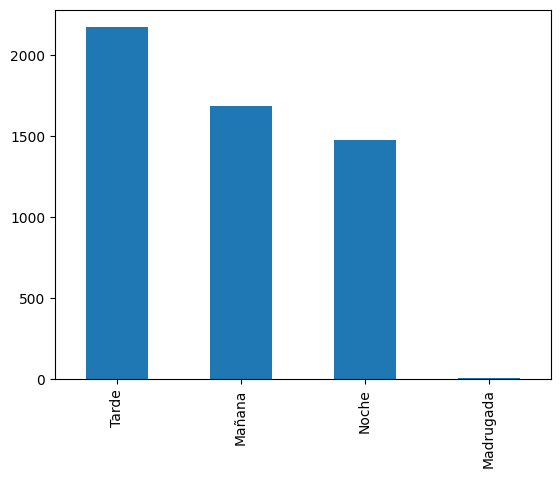

In [9]:
df['Time'].value_counts().plot(kind='bar')

* Nota: Vemos que hay una **representacion baja de valores de madrugada**. 

<Axes: >

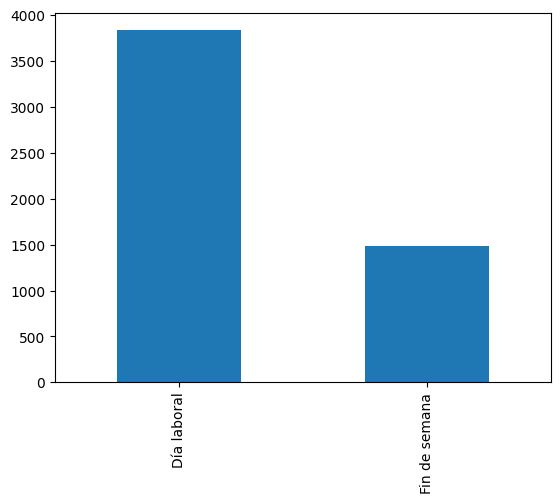

In [10]:
df['Day_of_Week'].value_counts().plot(kind='bar')

<Axes: >

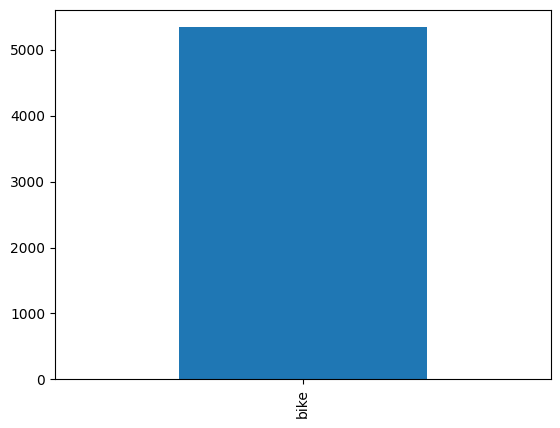

In [11]:
df['Vehicle_Type'].value_counts().plot(kind='bar')

**Esto es problematico, vemos que en la base de datos solo hay ejemplos para muertes de bicicletas**. Por tanto esta variable es irrelevante. **Vamos a dropearla de una vez de la base de datos**

In [12]:
df = df.drop('Vehicle_Type', axis=1)

In [13]:
df.dtypes

Time                                            string
Number_of_Casualties                             int64
Day_of_Week                                     string
Road_Type                                        int64
Speed_limit                                    float64
Light_Conditions                                 int64
Weather_Conditions                               int64
Road_Surface_Conditions                          int64
Urban_or_Rural_Area                              int64
Did_Police_Officer_Attend_Scene_of_Accident      int64
Junction_Detail                                  int64
Number_of_Vehicles                               int64
Accident_Severity                                int64
Unnamed: 14                                    float64
dtype: object

* Ahora bien, ya que terminamos el analisis de las variables string continuaremos con las que son categoricas segun la base de datos. Sin embargo antes analizaremos una la columna Unnamed. **Llama la atención que hay un alto porcentaje de valores nulos**

In [14]:
print('Hay ' + str(len(df['Unnamed: 14'].isna())) + ' valores nulos en esta columna de ' + str(df.shape[0]))

Hay 5338 valores nulos en esta columna de 5338


In [15]:
#Vamos a dropearla
df = df.drop('Unnamed: 14', axis=1)

### 1.1 Análisis Variables categoricas

* Segun el diccionario de la base de datos las siguientes variables son categoricas
    - Accident_severity
    - Day_of_Week
    - Time
    - Road type
    - Junction_detail
    - Light_conditions
    - Weather_Conditions
    - Road_surface_conditions
    - Urban_or_Rural_Area
    - Vehicle_Type
    - Did_Police_Officer_Attend_Scene_of_Accident



* Vamos a convertir estas a str y ver sus distribuciones entre las categoriasy analizar los resultados.

#### 1.1.1 Convertir a string

In [16]:
cat_vars = ['Accident_Severity', 
'Day_of_Week', 
'Time', 'Road_Type', 
'Junction_Detail', 
'Light_Conditions', 
'Weather_Conditions', 
'Road_Surface_Conditions', 
'Urban_or_Rural_Area', 
#'Vehicle_type', // Esta la dropeamos
'Did_Police_Officer_Attend_Scene_of_Accident']

for var in cat_vars:
    df[var] = df[var].astype('string')

In [17]:
df.dtypes

Time                                            string
Number_of_Casualties                             int64
Day_of_Week                                     string
Road_Type                                       string
Speed_limit                                    float64
Light_Conditions                                string
Weather_Conditions                              string
Road_Surface_Conditions                         string
Urban_or_Rural_Area                             string
Did_Police_Officer_Attend_Scene_of_Accident     string
Junction_Detail                                 string
Number_of_Vehicles                               int64
Accident_Severity                               string
dtype: object

#### 1.1.2 Reemplazar por labels del diccionario para las que faltan y ver su distribucion

In [18]:
# Bien, ahora miremos las distribuciones
def plot_distribution(df: pd.DataFrame, col: str, dropna=True):
    df[col].value_counts(dropna=dropna).plot(kind='bar')

In [19]:
df['Accident_Severity'] = df['Accident_Severity'].replace({'1': 'Fatal', '2': 'Serio', '3': 'Leve'})

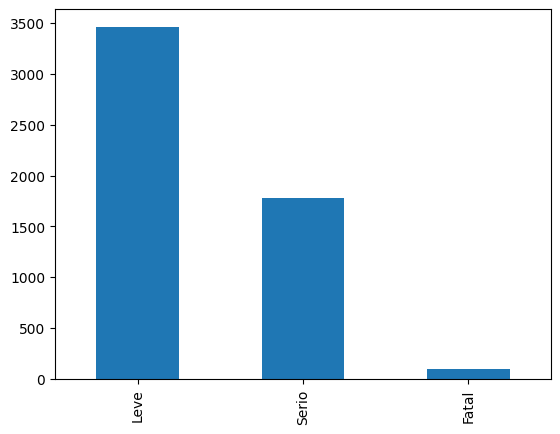

In [20]:
plot_distribution(df, 'Accident_Severity')

In [21]:
labels = ['Rotonda', '1SoloSentido', 'Autovia', 'Calzada', 'Circunvalacion', 'Desconocida']
numbers = list(map(str,[1,2,3,6,7,9]))
df['Road_Type'] = df['Road_Type'].replace(dict(zip(numbers, labels)))

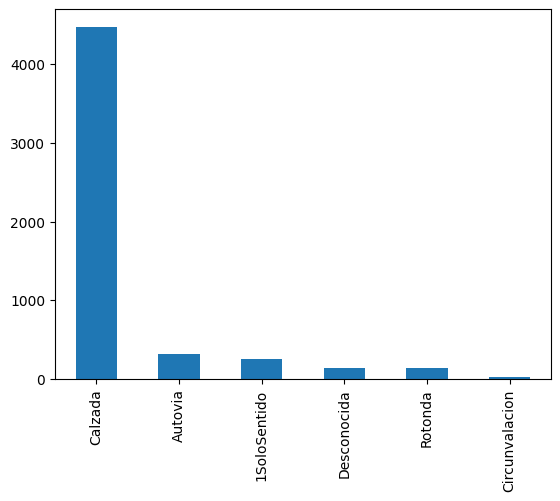

In [22]:
plot_distribution(df, 'Road_Type')

In [23]:
df['Junction_Detail'] = df['Junction_Detail'].astype('string')

In [24]:
df['Junction_Detail'].value_counts(dropna=False)

0     2763
3     1555
6      468
1      199
9      171
7       68
8       43
2       34
-1      25
5       12
Name: Junction_Detail, dtype: Int64

In [25]:
labels = {'0': 'No_hay_cruce', '1': 'Rotonda', '2': 'Minirotonda', '3': 'T', '5': 'Carretera_Acceso', '6': 'Encrucijada', '7': '+4salidas', '8': 'Entrada_Privada', '9': 'Otros', '-1': np.NAN}

In [26]:
df['Junction_Detail'] = df['Junction_Detail'].replace(labels)

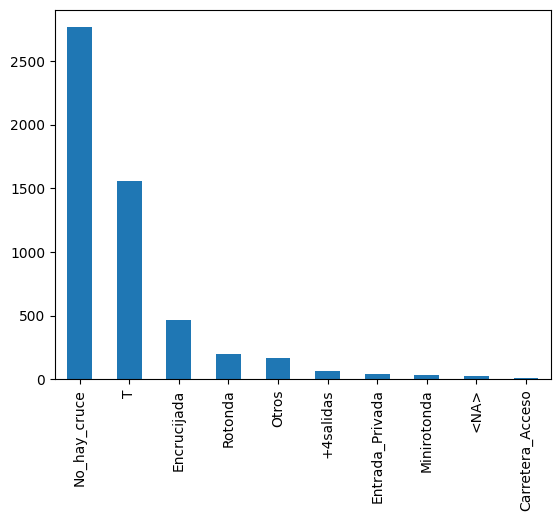

In [27]:
plot_distribution(df, 'Junction_Detail', False)

**Vemos que hay nans en esta característica**. Son pocos entonces más adelante lso imputaremos con la moda (No_hay_cruce).

In [28]:
labels_light_conditions = {'1': 'Diurna' , '4': 'Oscuridad_Luces_Encendidas', '6': 'Oscuridad_Sin_Iluminacion' , '7': 'Oscuridad_Iluminacion_Desconocida', '5': 'Oscuridad_Luces_Apagadas'}

In [29]:
df['Light_Conditions'] = df['Light_Conditions'].replace(labels_light_conditions)

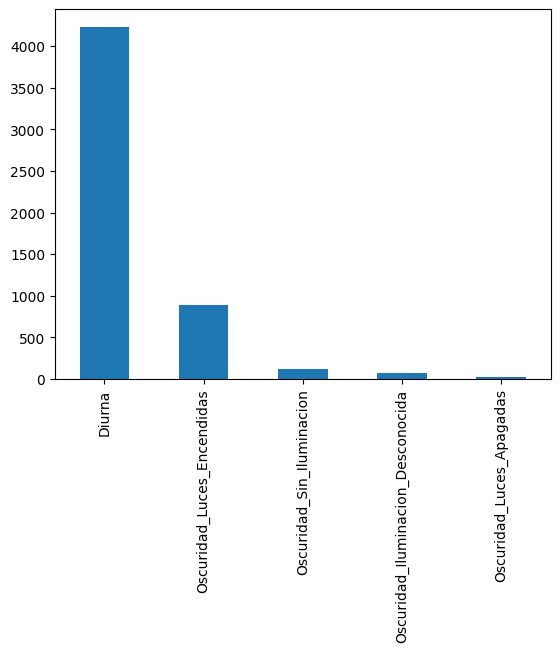

In [30]:
plot_distribution(df, 'Light_Conditions')

In [31]:
df['Weather_Conditions'].value_counts()

1    4621
2     321
9     191
8      80
4      59
5      46
3      12
7       7
6       1
Name: Weather_Conditions, dtype: Int64

In [32]:
labels = ['Bien, con vientos suaves', 'Lluvioso', 'Nevando', 'Bien, con vientos fuertes', 'Lluvioso, con vientos fuertes'
, 'Nevando, con vientos fuertes', 'Niebla', 'Otro', 'Desconocido']
replace_weather_conditions =  dict(map(lambda x: (str(x[0] + 1), x[1]), enumerate(labels)))

In [33]:
replace_weather_conditions

{'1': 'Bien, con vientos suaves',
 '2': 'Lluvioso',
 '3': 'Nevando',
 '4': 'Bien, con vientos fuertes',
 '5': 'Lluvioso, con vientos fuertes',
 '6': 'Nevando, con vientos fuertes',
 '7': 'Niebla',
 '8': 'Otro',
 '9': 'Desconocido'}

In [34]:
df['Weather_Conditions'] = df['Weather_Conditions'].replace(replace_weather_conditions)

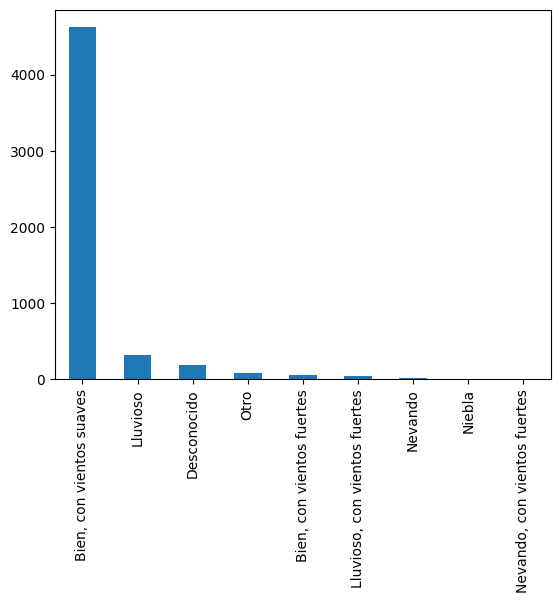

In [35]:
plot_distribution(df, 'Weather_Conditions')

In [36]:
df['Road_Surface_Conditions'].value_counts()

1     4260
2      901
4       87
-1      81
3        8
5        1
Name: Road_Surface_Conditions, dtype: Int64

In [37]:
labels = ['Seca', 'Húmeda', 'Nieve', 'Hielo', 'Inundadas', 'Aceite', 'Fango']
replace_road_surface_conditions=  dict(map(lambda x: (str(x[0] + 1), x[1]), enumerate(labels))) | {'-1': np.NAN}
replace_road_surface_conditions

{'1': 'Seca',
 '2': 'Húmeda',
 '3': 'Nieve',
 '4': 'Hielo',
 '5': 'Inundadas',
 '6': 'Aceite',
 '7': 'Fango',
 '-1': nan}

In [38]:
df['Road_Surface_Condition'] = df['Road_Surface_Conditions'].replace(replace_road_surface_conditions)

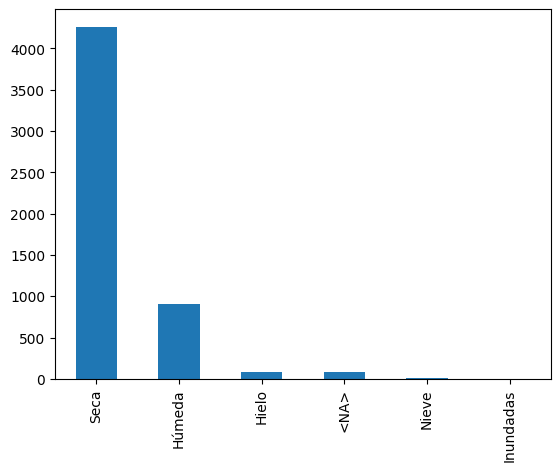

In [39]:
plot_distribution(df, 'Road_Surface_Condition', False)

In [40]:
df['Urban_or_Rural_Area'].value_counts()

1    4040
2    1298
Name: Urban_or_Rural_Area, dtype: Int64

In [41]:
labels = ['Urbano', 'Rural', 'No especificado']
replace_urban_rural=  dict(map(lambda x: (str(x[0] + 1), x[1]), enumerate(labels))) 
replace_urban_rural

{'1': 'Urbano', '2': 'Rural', '3': 'No especificado'}

In [42]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].replace(replace_urban_rural)

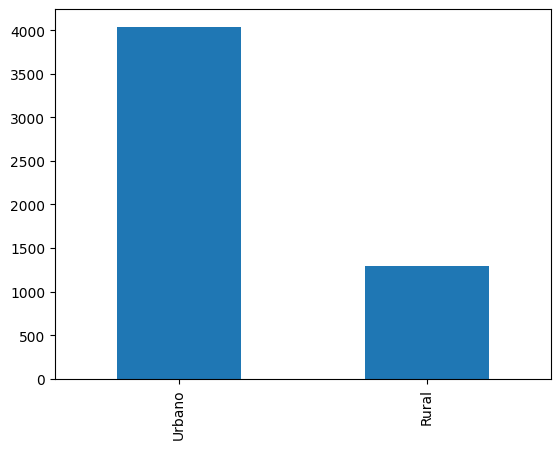

In [43]:
plot_distribution(df, 'Urban_or_Rural_Area')

In [44]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

1     4059
2     1231
3       46
-1       2
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: Int64

In [45]:
replace_police = {'1': 'Si', '2': 'No', '3': 'No se reporto', '-1': np.NAN}

In [46]:
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].replace(replace_police)

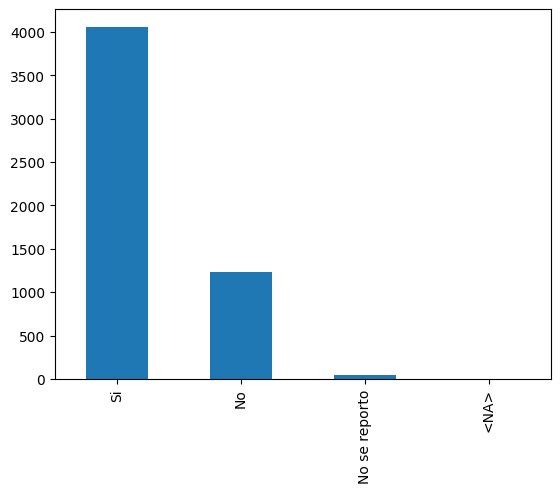

In [47]:
plot_distribution(df, 'Did_Police_Officer_Attend_Scene_of_Accident', False)

### 1.2 Analisis Variables Continuas

#### 1.2.1 Recuperar variables continuas

- Vamos a analizar el, número de missing values y distribución de cada una de estas variables

In [48]:
is_str = lambda x: type(df[x].dtype) is pd.core.arrays.string_.StringDtype

In [49]:
list(df.columns)

['Time',
 'Number_of_Casualties',
 'Day_of_Week',
 'Road_Type',
 'Speed_limit',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Junction_Detail',
 'Number_of_Vehicles',
 'Accident_Severity',
 'Road_Surface_Condition']

In [50]:
cont_cols = list(filter(lambda x: not is_str(x), list(df.columns)))

In [51]:
cont_cols

['Number_of_Casualties', 'Speed_limit', 'Number_of_Vehicles']

#### 1.2.2 Explorar distribuciones

* Miremos la densidad del numero de muertes

<Axes: ylabel='Density'>

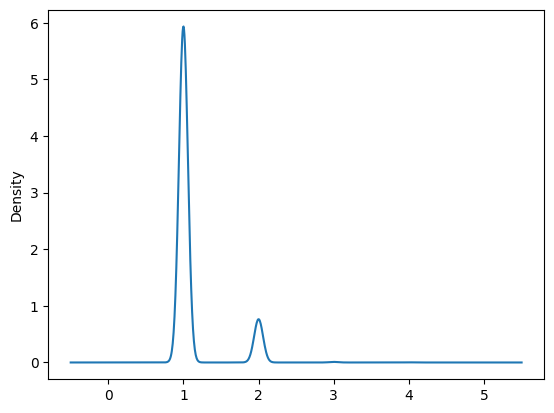

In [52]:
df[cont_cols[0]].plot(kind='kde', ylabel='Density Number of Casualties')

- Vemos que para esta variable la mayoria estan concentradas en 1 y el resto en 2, 3 o 4. Vamos a convertir esta variable en una variable categorica

In [53]:
df[cont_cols[0]] = df[cont_cols[0]].astype('string')

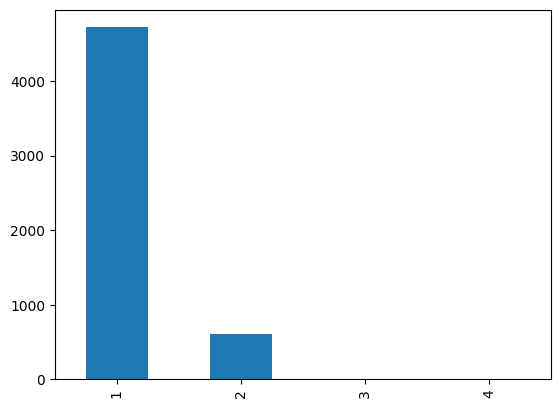

In [54]:
plot_distribution(df, cont_cols[0])

In [55]:
#Actualizemos las variables continuas ya que removimos una
cont_cols = cont_cols[1:]

In [56]:
#Sigamos explorando ahora esta variable
cont_cols[0]

'Speed_limit'

<Axes: ylabel='Density'>

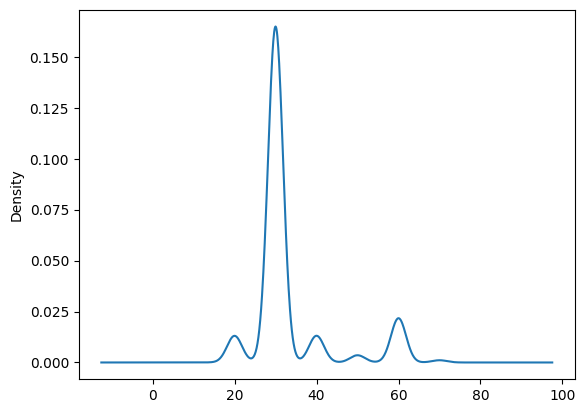

In [57]:
df[cont_cols[0]].plot(kind='kde')

In [58]:
#Veamos ahora los value counts
df[cont_cols[0]].value_counts()

30.0    4047
60.0     533
40.0     322
20.0     321
50.0      87
70.0      27
15.0       1
Name: Speed_limit, dtype: int64

In [59]:
# Tampoco tiene mucha variabilidad, vamos a pasarla a discreta.

In [60]:
df[cont_cols[0]] = df[cont_cols[0]].astype('string')

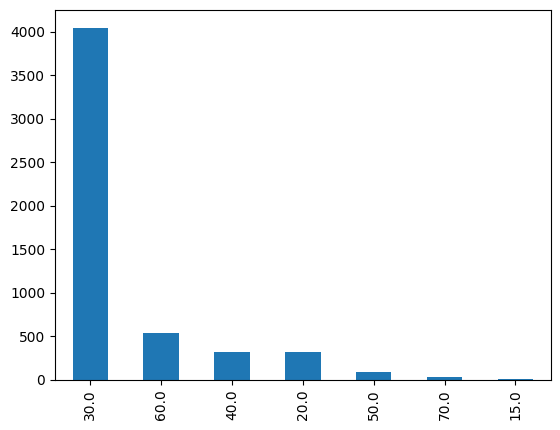

In [61]:
plot_distribution(df, cont_cols[0])

In [62]:
#Actualizemos ya que volvimos a reducir este conjunto de variables continuas
cont_cols = cont_cols[1:]
cont_cols

['Number_of_Vehicles']

<Axes: ylabel='Density'>

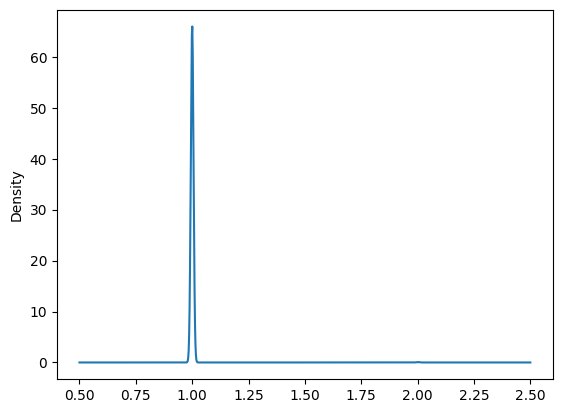

In [63]:
#Exploremos la distribución de número de vehiculos
df[cont_cols[0]].plot(kind='kde')

In [64]:
#Miremos los value counts
df[cont_cols[0]].value_counts()

1    5332
2       6
Name: Number_of_Vehicles, dtype: int64

In [65]:
#No hay variabilidad, vale más la pena estudiarla como variable categorica

In [66]:
df[cont_cols[0]] = df[cont_cols[0]].astype('string')

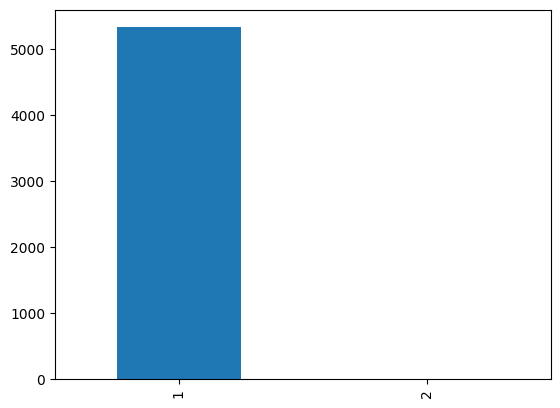

In [67]:
plot_distribution(df, cont_cols[0])

### 1.3 Resumen resultado exploración

- Tenemos entonces las siguientes variables

In [68]:
df.dtypes

Time                                           string
Number_of_Casualties                           string
Day_of_Week                                    string
Road_Type                                      string
Speed_limit                                    string
Light_Conditions                               string
Weather_Conditions                             string
Road_Surface_Conditions                        string
Urban_or_Rural_Area                            string
Did_Police_Officer_Attend_Scene_of_Accident    string
Junction_Detail                                string
Number_of_Vehicles                             string
Accident_Severity                              string
Road_Surface_Condition                         string
dtype: object

- Como vemos, debido a la baja variabilidad de las que representaban valores númericos originalmente, optamos por tratarlas como categoricas.
- Miremos el número de valores faltantes por columna

In [69]:
df.isna().sum()

Time                                            0
Number_of_Casualties                            0
Day_of_Week                                    19
Road_Type                                       0
Speed_limit                                     0
Light_Conditions                                0
Weather_Conditions                              0
Road_Surface_Conditions                         0
Urban_or_Rural_Area                             0
Did_Police_Officer_Attend_Scene_of_Accident     2
Junction_Detail                                25
Number_of_Vehicles                              0
Accident_Severity                               0
Road_Surface_Condition                         81
dtype: int64

- Vemos que, relativo al total de observaciones el número de valores faltantes es bajo y por tanto procederemos a hacer una imputación con la moda para las variables categoricas (todas). En la siguiente seccion realizaremos esto y posteriormente un OneHotEncoding.

## 2. Construcción del Pipeline

In [70]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [79]:
df[:] = df[:].astype('category')

/var/folders/r_/zq13xvq14tn3xjm_rnxttsn00000gn/T/ipykernel_83525/2749921371.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df[:] = df[:].astype('category')


In [80]:
#Transformación necesaria para que identifique
df[:] = df[:].replace({np.NAN: None})
df.isna().sum()

/var/folders/r_/zq13xvq14tn3xjm_rnxttsn00000gn/T/ipykernel_83525/2637582962.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df[:] = df[:].replace({np.NAN: None})


Time                                            0
Number_of_Casualties                            0
Day_of_Week                                    19
Road_Type                                       0
Speed_limit                                     0
Light_Conditions                                0
Weather_Conditions                              0
Road_Surface_Conditions                         0
Urban_or_Rural_Area                             0
Did_Police_Officer_Attend_Scene_of_Accident     2
Junction_Detail                                25
Number_of_Vehicles                              0
Accident_Severity                               0
Road_Surface_Condition                         81
dtype: int64

In [82]:
cols

['Time',
 'Number_of_Casualties',
 'Day_of_Week',
 'Road_Type',
 'Speed_limit',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Junction_Detail',
 'Number_of_Vehicles',
 'Accident_Severity',
 'Road_Surface_Condition']

In [90]:
cols = list(df.columns)
imputer = SimpleImputer(strategy ='most_frequent', missing_values=None)
imputed = pd.DataFrame(imputer.fit_transform(df), columns=cols)
imputed.isna().sum()

Time                                           0
Number_of_Casualties                           0
Day_of_Week                                    0
Road_Type                                      0
Speed_limit                                    0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Detail                                0
Number_of_Vehicles                             0
Accident_Severity                              0
Road_Surface_Condition                         0
dtype: int64

In [94]:
imputed.head()

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Road_Surface_Condition
0,Mañana,1,Día laboral,Calzada,30.0,Diurna,"Bien, con vientos suaves",1,Urbano,Si,T,1,Leve,Seca
1,Mañana,1,Día laboral,Calzada,30.0,Diurna,"Bien, con vientos suaves",1,Urbano,Si,No_hay_cruce,1,Leve,Seca
2,Tarde,1,Fin de semana,Calzada,30.0,Diurna,"Bien, con vientos suaves",1,Urbano,Si,T,1,Leve,Seca
3,Tarde,2,Día laboral,Calzada,30.0,Diurna,"Bien, con vientos suaves",1,Urbano,Si,Encrucijada,1,Serio,Seca
4,Mañana,2,Día laboral,Calzada,30.0,Diurna,"Bien, con vientos suaves",1,Urbano,Si,Encrucijada,1,Leve,Seca


In [99]:
one_hot = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded = one_hot.fit_transform(imputed)
encoded

/Users/elefantickets/laboratory-01/venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

- Si bien esta base de datos ya está lista para ser procesada haremos un paso extra para recuperar los labels

In [101]:
one_hot.get_feature_names_out()

array(['Time_Madrugada', 'Time_Mañana', 'Time_Noche', 'Time_Tarde',
       'Number_of_Casualties_1', 'Number_of_Casualties_2',
       'Number_of_Casualties_3', 'Number_of_Casualties_4',
       'Day_of_Week_Día laboral', 'Day_of_Week_Fin de semana',
       'Road_Type_1SoloSentido', 'Road_Type_Autovia', 'Road_Type_Calzada',
       'Road_Type_Circunvalacion', 'Road_Type_Desconocida',
       'Road_Type_Rotonda', 'Speed_limit_15.0', 'Speed_limit_20.0',
       'Speed_limit_30.0', 'Speed_limit_40.0', 'Speed_limit_50.0',
       'Speed_limit_60.0', 'Speed_limit_70.0', 'Light_Conditions_Diurna',
       'Light_Conditions_Oscuridad_Iluminacion_Desconocida',
       'Light_Conditions_Oscuridad_Luces_Apagadas',
       'Light_Conditions_Oscuridad_Luces_Encendidas',
       'Light_Conditions_Oscuridad_Sin_Iluminacion',
       'Weather_Conditions_Bien, con vientos fuertes',
       'Weather_Conditions_Bien, con vientos suaves',
       'Weather_Conditions_Desconocido', 'Weather_Conditions_Lluvioso',
      

In [102]:
cols = one_hot.get_feature_names_out()

In [103]:
final_df = pd.DataFrame(encoded, columns=cols)

In [104]:
final_df.head()

,Time_Madrugada,Time_Mañana,Time_Noche,Time_Tarde,Number_of_Casualties_1,Number_of_Casualties_2,Number_of_Casualties_3,Number_of_Casualties_4,Day_of_Week_Día laboral,Day_of_Week_Fin de semana,...,Number_of_Vehicles_1,Number_of_Vehicles_2,Accident_Severity_Fatal,Accident_Severity_Leve,Accident_Severity_Serio,Road_Surface_Condition_Hielo,Road_Surface_Condition_Húmeda,Road_Surface_Condition_Inundadas,Road_Surface_Condition_Nieve,Road_Surface_Condition_Seca
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


- Como vemos, vamos a realizar el clustering en un espacio de 67 dimensiones.

## 3. Guardar Base de Datos con Preprocesamiento General

In [105]:
final_df.to_csv('./final_preprocessed.csv')

In [113]:
# Para cargar simplemente hacemos
clean_df = pd.read_csv('./final_preprocessed.csv')
#Dropeamos el indice
clean_df = clean_df.drop('Unnamed: 0', axis=1)

In [116]:
clean_df.head()

,Time_Madrugada,Time_Mañana,Time_Noche,Time_Tarde,Number_of_Casualties_1,Number_of_Casualties_2,Number_of_Casualties_3,Number_of_Casualties_4,Day_of_Week_Día laboral,Day_of_Week_Fin de semana,...,Number_of_Vehicles_1,Number_of_Vehicles_2,Accident_Severity_Fatal,Accident_Severity_Leve,Accident_Severity_Serio,Road_Surface_Condition_Hielo,Road_Surface_Condition_Húmeda,Road_Surface_Condition_Inundadas,Road_Surface_Condition_Nieve,Road_Surface_Condition_Seca
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
